<a href="https://colab.research.google.com/github/seyonechithrananda/ncov-ligand-protein/blob/master/Balanced_Scaffold_Split_RF_hyperparam_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get DeepChem + RDKit working in Colab using wget and some bash commands

In [1]:
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')


--2020-04-26 04:48:48--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  81.12M   104MB/s    in 0.8s    

2020-04-26 04:48:49 (104 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b6447c_0
    - 

In [2]:
import tensorflow as tf
print("tf.__version__: %s" % str(tf.__version__))
device_name = tf.test.gpu_device_name()
if not device_name:
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


tf.__version__: 2.2.0-rc3
Found GPU at: /device:GPU:0


In [3]:
!git clone https://github.com/deepchem/deepchem.git

Cloning into 'deepchem'...
remote: Enumerating objects: 30600, done.
remote: Total 30600 (delta 0), reused 0 (delta 0), pack-reused 30600
Receiving objects: 100% (30600/30600), 437.66 MiB | 13.41 MiB/s, done.
Resolving deltas: 100% (22593/22593), done.


In [4]:
%cd deepchem/

/content/deepchem


In [5]:
!python setup.py install

     |████████████████████████████████| 110 kB 2.7 MB/s 
running install
[pbr] Writing ChangeLog
[pbr] Generating ChangeLog
[pbr] ChangeLog complete (0.1s)
[pbr] Generating AUTHORS
[pbr] AUTHORS complete (0.1s)
running build
running build_py
creating build
creating build/lib
creating build/lib/deepchem
copying deepchem/__init__.py -> build/lib/deepchem
creating build/lib/deepchem/splits
creating build/lib/deepchem/splits/tests
copying deepchem/splits/tests/test_splitter.py -> build/lib/deepchem/splits/tests
copying deepchem/splits/tests/test_task_splitter.py -> build/lib/deepchem/splits/tests
copying deepchem/splits/tests/__init__.py -> build/lib/deepchem/splits/tests
creating build/lib/deepchem/data
copying deepchem/data/test_data_loader.py -> build/lib/deepchem/data
copying deepchem/data/supports.py -> build/lib/deepchem/data
copying deepchem/data/data_loader.py -> build/lib/deepchem/data
copying deepchem/data/datasets.py -> build/lib/deepchem/data
copying deepchem/data/__init__.py -

In [0]:
import deepchem as dc

In [7]:
!conda install pandas

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.1         |           py37_0         155 KB
    conda-4.8.3                |           py37_0         2.8 MB
    openssl-1.1.1g             |       h7b6447c_0         2.5 MB
    pandas-1.0.3               |   py37h0573a6f_0         8.6 MB
    ------------------------------------------------------------
                                           Total:        14.1 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2020.4.5~ --> pkgs/main::ca-certificates-2020.1.1-0
  certifi            conda-forge::certifi-2020.4.5.1-py37h~ --> pkg

In [0]:
import os 
import sys 
import pandas as pd

# train --> balanced dataset
dataset_train_file = "/content/drive/My Drive/Project De Novo/AID1706_binarized_sars_12k_samples.csv"
dataset_eval_file = "/content/drive/My Drive/Project De Novo/evaluation_set_v2_balanced - evaluation_set_v2.csv"
dataset_train = pd.read_csv(dataset_train_file)
dataset_eval = pd.read_csv(dataset_eval_file)

In [11]:
featurizer = dc.feat.CircularFingerprint(size=1024)

loader = dc.data.CSVLoader(
      tasks=["activity"], smiles_field="smiles",
      featurizer=featurizer)
train_data_circular = loader.featurize(dataset_train_file)

Loading raw samples now.
shard_size: 8192
About to start loading CSV from /content/drive/My Drive/Project De Novo/AID1706_binarized_sars_12k_samples.csv
Loading shard 1 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
Featurizing sample 4000
Featurizing sample 5000
Featurizing sample 6000
Featurizing sample 7000
Featurizing sample 8000
TIMING: featurizing shard 0 took 25.585 s
Loading shard 2 of size 8192.
Featurizing sample 0
Featurizing sample 1000
Featurizing sample 2000
Featurizing sample 3000
TIMING: featurizing shard 1 took 11.949 s
TIMING: dataset construction took 37.908 s
Loading dataset from disk.


In [12]:
loader_eval = dc.data.CSVLoader(
    tasks=["label"], smiles_field="smiles", 
    featurizer=featurizer)
test_circular = loader_eval.featurize(dataset_eval_file)

Loading raw samples now.
shard_size: 8192
About to start loading CSV from /content/drive/My Drive/Project De Novo/evaluation_set_v2_balanced - evaluation_set_v2.csv
Loading shard 1 of size 8192.
Featurizing sample 0
TIMING: featurizing shard 0 took 0.328 s
TIMING: dataset construction took 0.341 s
Loading dataset from disk.


In [16]:
# only generate train + valid datasets, as we already have a test dataset.
splitter_train = dc.splits.ScaffoldSplitter(dataset_train_file)
train_circular, valid_circular = splitter_train.train_test_split(train_data_circular)


Computing train/valid/test indices
About to generate scaffolds
Generating scaffold 0/11999
Generating scaffold 1000/11999
Generating scaffold 2000/11999
Generating scaffold 3000/11999
Generating scaffold 4000/11999
Generating scaffold 5000/11999
Generating scaffold 6000/11999
Generating scaffold 7000/11999
Generating scaffold 8000/11999
Generating scaffold 9000/11999
Generating scaffold 10000/11999
Generating scaffold 11000/11999
About to sort in scaffold sets
TIMING: dataset construction took 0.526 s
Loading dataset from disk.
TIMING: dataset construction took 0.224 s
Loading dataset from disk.


In [0]:
# convert SMILES to Mol + visualize as images

import tempfile
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from itertools import islice
from IPython.display import Image, display, HTML

def display_images(filenames):
    """Helper to pretty-print images."""
    for filename in filenames:
        display(Image(filename))

def mols_to_pngs(mols, basename="test"):
    """Helper to write RDKit mols to png files."""
    filenames = []
    for i, mol in enumerate(mols):
        filename = "BACE_%s%d.png" % (basename, i)
        Draw.MolToFile(mol, filename)
        filenames.append(filename)
        if i is 10:
          break
    return filenames





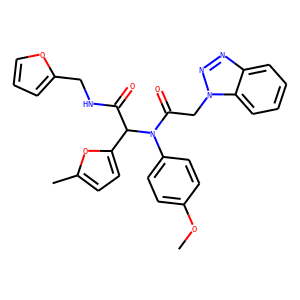

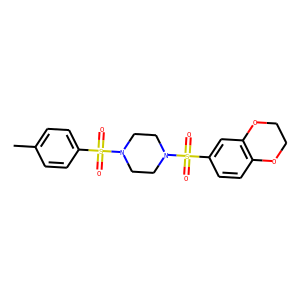

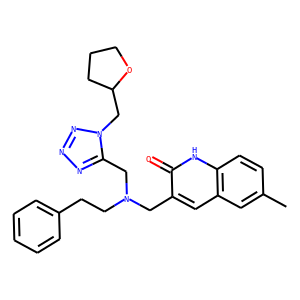

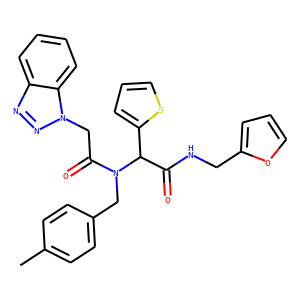

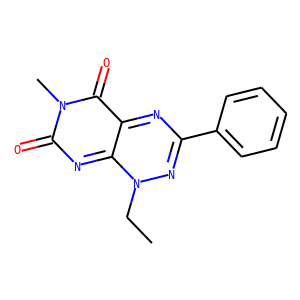

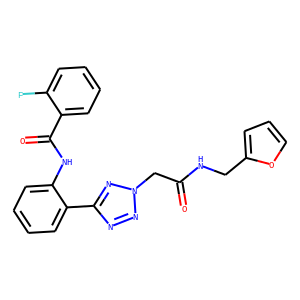

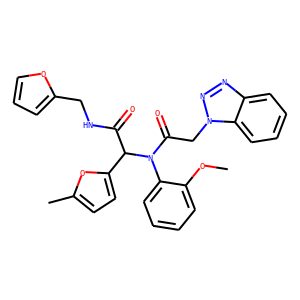

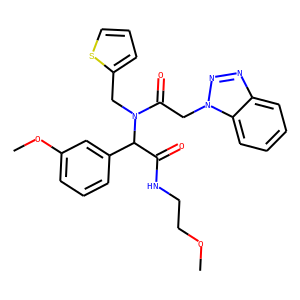

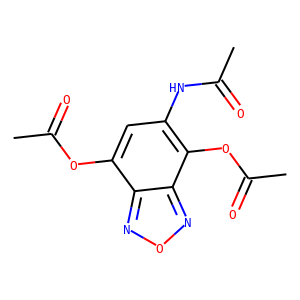

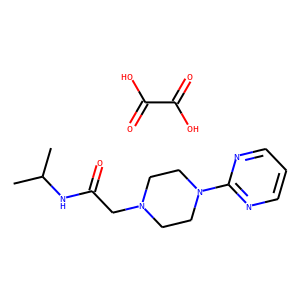

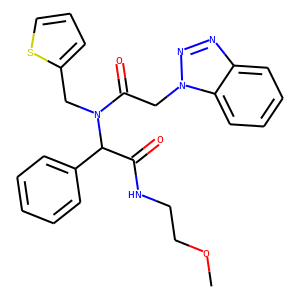

In [17]:
train_mols = [Chem.MolFromSmiles(compound)
              for compound in train_circular.ids]
display_images(mols_to_pngs(train_mols, basename="train"))


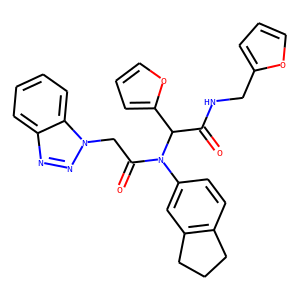

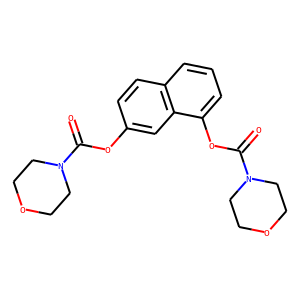

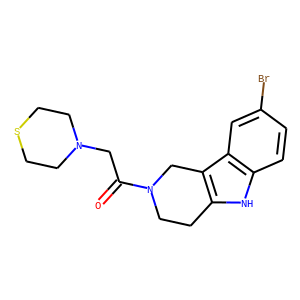

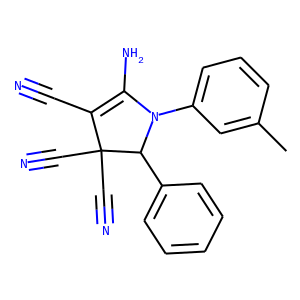

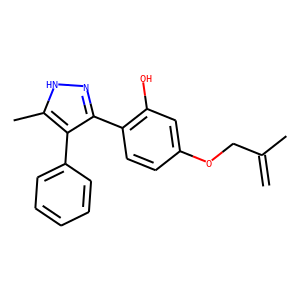

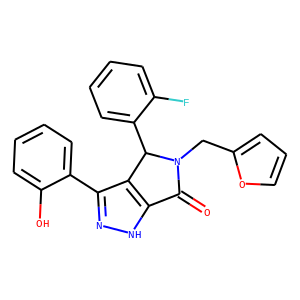

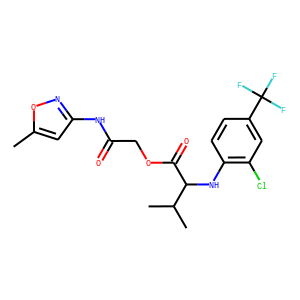

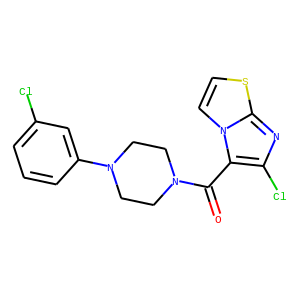

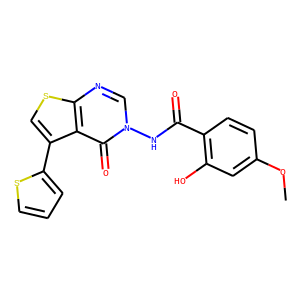

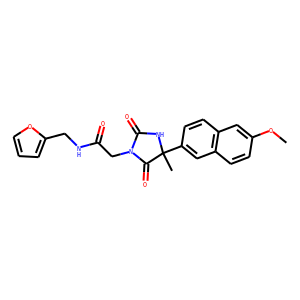

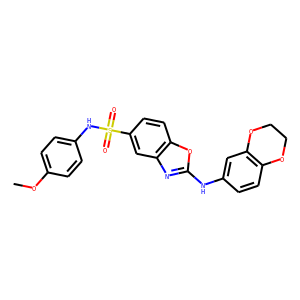

In [18]:
eval_mols = [Chem.MolFromSmiles(compound)
              for compound in valid_circular.ids]
display_images(mols_to_pngs(eval_mols, basename="eval"))

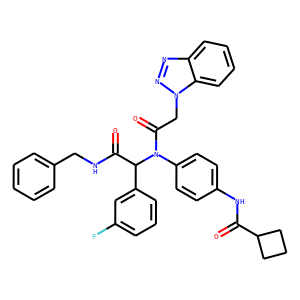

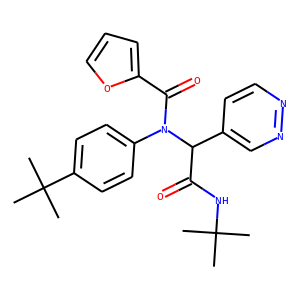

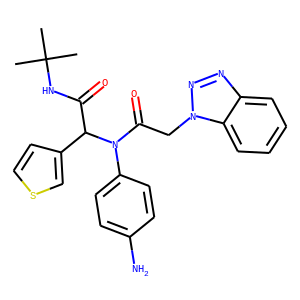

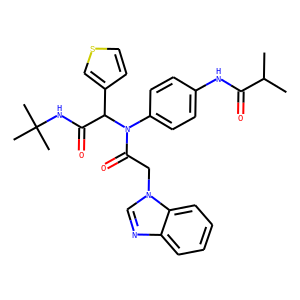

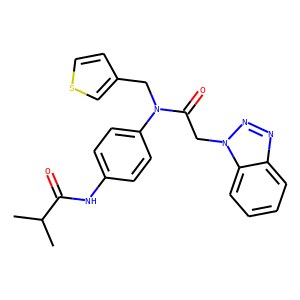

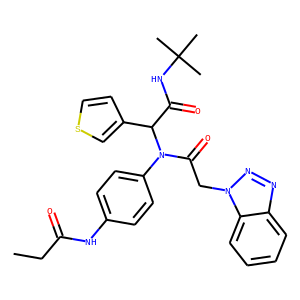

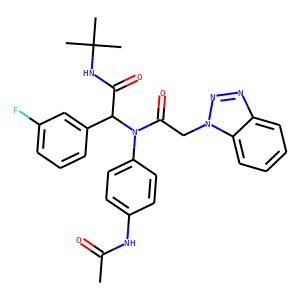

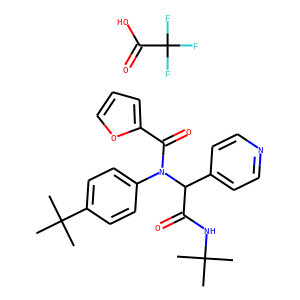

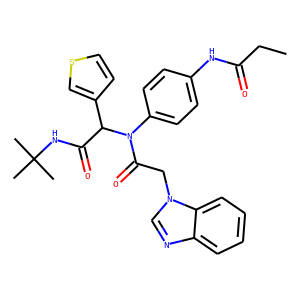

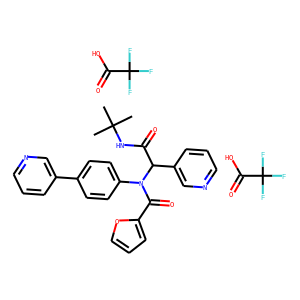

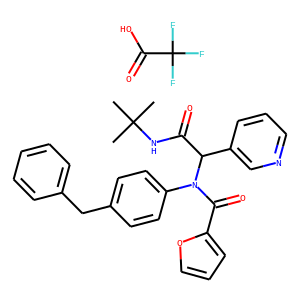

In [19]:
test_mols = [Chem.MolFromSmiles(compound)
              for compound in test_circular.ids]
display_images(mols_to_pngs(test_mols, basename="eval"))

In [0]:
'''
transformers = [
    dc.trans.NormalizationTransformer(transform_y=True, dataset=train_dataset)]

for dataset in [train_circular, valid_circular, test_circular]:
  for transformer in transformers:
      dataset = transformer.transform(dataset)
'''



In [20]:
# install sklearn
!conda install scikit-learn


Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |         openblas          46 KB
    scikit-learn-0.22.1        |   py37h22eb022_0         5.3 MB
    ------------------------------------------------------------
                                           Total:         5.3 MB

The following NEW packages will be INSTALLED:

  blas               pkgs/main/linux-64::blas-1.0-openblas

The following packages will be SUPERSEDED by a higher-priority channel:

  scikit-learn       conda-forge::scikit-learn-0.22.2.post~ --> pkgs/main::scikit-learn-0.22.1-py37h22eb022_0


Proceed ([y]/n)? y


scikit-learn-0.22.1  | 5.3 MB    | : 100% 1.0/1 [00:0

In [21]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 163 kB 2.7 MB/s 


In [47]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn_model = BalancedRandomForestClassifier(max_depth=2, random_state=42, class_weight='balanced')
#sklearn_model = RandomForestClassifier(max_depth = 2, random_state = 42, class_weight='balanced')
model = RandomForestClassifier(max_depth = 2, random_state = 42, class_weight='balanced')
#model = dc.models.SklearnModel(sklearn_model)
model.fit(train_circular.X, train_circular.y)
#model.fit(x_train, y_train)




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

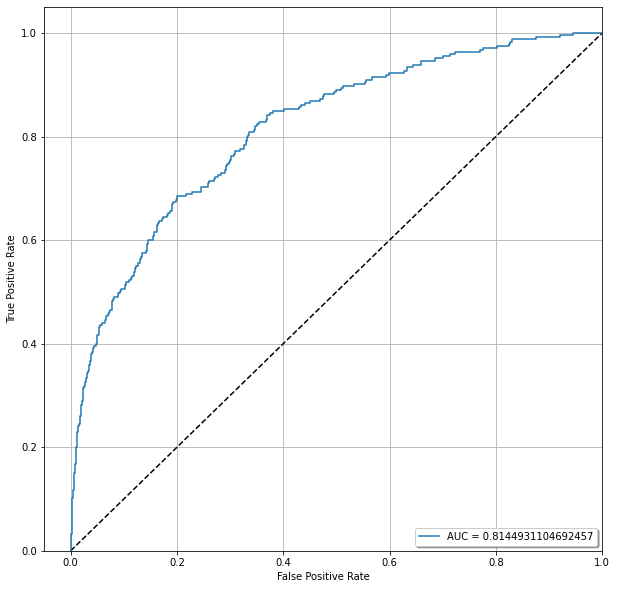

In [48]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# overall accuracy
acc = model.score(valid_circular.X, valid_circular.y)

# get roc/auc info
y_mol_score = model.predict_proba(valid_circular.X)[:,1]

fpr = dict()
tpr = dict()
fpr, tpr, _= roc_curve(valid_circular.y, y_mol_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

#make plot 
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()


In [50]:
print(y_mol_score)
print(valid_circular.y)

print(roc_auc)
print (acc)

[0.57482558 0.47135432 0.51745827 ... 0.4336319  0.45610114 0.43096497]
[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]
0.8144931104692457
0.8666666666666667


In [52]:
from sklearn import metrics

y_pred_mol = model.predict(valid_circular.X)
print ("Accuracy:", metrics.accuracy_score(valid_circular.y, y_pred_mol))

Accuracy: 0.8666666666666667


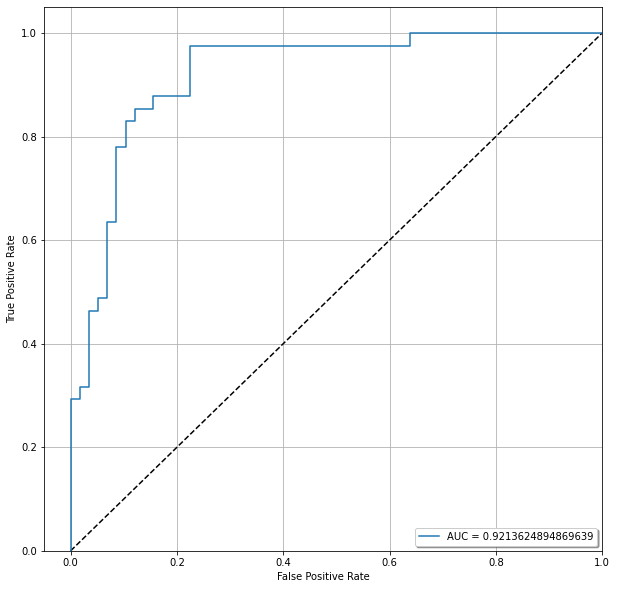

In [0]:
#compare validation results with test results (different assay, same target)


# overall accuracy
acc = model.score(test_circular.X, test_circular.y)

# get roc/auc info
y_mol_score = model.predict_proba(test_circular.X)[:,1]

fpr = dict()
tpr = dict()
fpr, tpr, _= roc_curve(test_circular.y, y_mol_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

#make plot 
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()


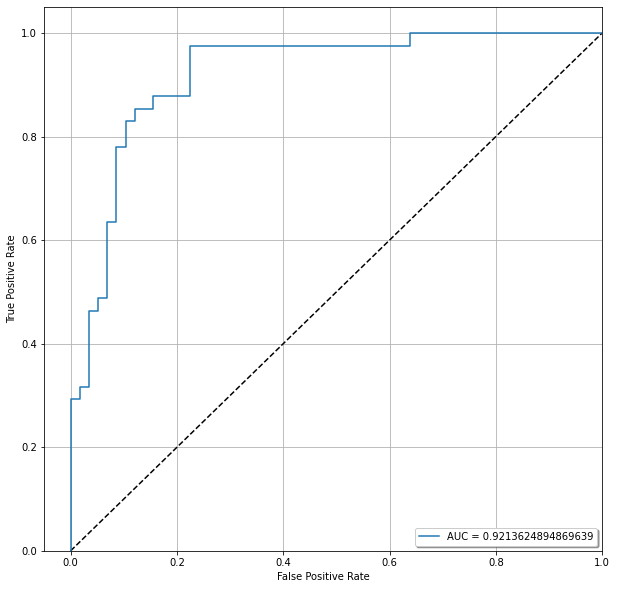

In [79]:
#generate accuracy for best hyperparam RF:
# overall accuracy
acc_test = model.score(test_circular.X, test_circular.y)

# get roc/auc info
y_mol_score_test = model.predict_proba(test_circular.X)[:,1]

fpr_test = dict()
tpr_test = dict()
fpr_test, tpr_test, _= roc_curve(test_circular.y, y_mol_score_test)

roc_auc_test = dict()
roc_auc_test = auc(fpr_test, tpr_test)

#make plot 
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr_test, tpr_test, label='AUC = {0}'.format(roc_auc_test))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()

In [76]:
print(y_mol_score_test)
print(test_circular.y)

print(roc_auc_test)
print (acc_test)

[0.53771716 0.47095168 0.57042543 0.51475234 0.58429513 0.57616309
 0.57773871 0.50817028 0.51475234 0.50061246 0.5225772  0.52854906
 0.55299109 0.52448964 0.57100977 0.5225772  0.50061246 0.57616309
 0.52140391 0.51694529 0.50021754 0.50298051 0.57846551 0.57616309
 0.51825309 0.5225772  0.57616309 0.50961745 0.5225772  0.58429513
 0.5225772  0.51884892 0.53714083 0.58253548 0.5225772  0.5309618
 0.51156048 0.5265767  0.53076844 0.58253548 0.50891444 0.49485444
 0.47596988 0.49674155 0.52367197 0.49484498 0.44873694 0.47826913
 0.47341184 0.46424455 0.48645239 0.50410936 0.46603073 0.47794034
 0.42976002 0.51169404 0.46611653 0.52470458 0.44478234 0.48357301
 0.50916815 0.4940932  0.45643528 0.55826259 0.45938896 0.49318538
 0.49743853 0.46314589 0.4478035  0.50842631 0.49555971 0.47544826
 0.46250137 0.4441783  0.44083808 0.46688622 0.54607897 0.52189488
 0.43314244 0.45047568 0.50883876 0.47178519 0.48894077 0.49286345
 0.44642145 0.50318745 0.4399985  0.50434297 0.50591154 0.49010

In [68]:
def rf_model_builder(model_params, model_dir):
  sklearn_model = RandomForestClassifier(**model_params, class_weight='balanced')
  return dc.models.SklearnModel(sklearn_model, model_dir)

params_dict = {
    "n_estimators": [200,300,500,1000],
    "max_features": ["auto", "sqrt", "log2", None],
}

transformers = []


metric = dc.metrics.Metric(dc.metrics.roc_auc_score)
optimizer = dc.hyper.HyperparamOpt(rf_model_builder)
best_rf, best_rf_hyperparams, all_rf_results = optimizer.hyperparam_search(
    params_dict, train_circular, valid_circular, transformers,
    metric=metric)


Fitting model 1/16
hyperparameters: {'n_estimators': 200, 'max_features': 'auto'}
computed_metrics: [0.837847435958142]
Model 1/16, Metric roc_auc_score, Validation set 0: 0.837847
	best_validation_score so far: 0.837847
Fitting model 2/16
hyperparameters: {'n_estimators': 200, 'max_features': 'sqrt'}
computed_metrics: [0.8625777735688243]
Model 2/16, Metric roc_auc_score, Validation set 1: 0.862578
	best_validation_score so far: 0.862578
Fitting model 3/16
hyperparameters: {'n_estimators': 200, 'max_features': 'log2'}
computed_metrics: [0.8604725602537999]
Model 3/16, Metric roc_auc_score, Validation set 2: 0.860473
	best_validation_score so far: 0.862578
Fitting model 4/16
hyperparameters: {'n_estimators': 200, 'max_features': None}
computed_metrics: [0.8289047776883375]
Model 4/16, Metric roc_auc_score, Validation set 3: 0.828905
	best_validation_score so far: 0.862578
Fitting model 5/16
hyperparameters: {'n_estimators': 300, 'max_features': 'auto'}
computed_metrics: [0.850231545054

In [71]:
rf_test_evaluator = Evaluator(best_rf, test_circular, transformers)
rf_test_roc = rf_test_evaluator.compute_model_performance([metric])
print("RF Test set ROC_AUC %f" % (rf_test_roc["roc_auc_score"]))


computed_metrics: [0.9823380992430614]
RF Test set ROC_AUC 0.982338


In [80]:
metric_acc = dc.metrics.Metric(dc.metrics.accuracy_score)
rf_test_acc = rf_test_evaluator.compute_model_performance([metric_acc])
print("RF Test set on accuracy %f" % (rf_test_acc["accuracy_score"]))


computed_metrics: [0.5858585858585859]
RF Test set on accuracy 0.585859


What happened above is larger amounts of trees without depth seem to perform worse, as if they almost begin to encode no actual knowledge at a certain point.

Results above are kinda weird, especially considering the RF with NO hyperparam tuning got 86% acc on test dataset. Below, I format a new instance of a RFClassifier with the model_params which were reported as best in the tuning process (1000 trees, max_features='log2', MAX_DEPTH = 2 --> THIS IS REALLY IMPORTANT). 

In [100]:
model_hyperparam = RandomForestClassifier(max_depth = 2, n_estimators=1000, max_features='log2', class_weight='balanced')
model_hyperparam.fit(train_circular.X, train_circular.y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

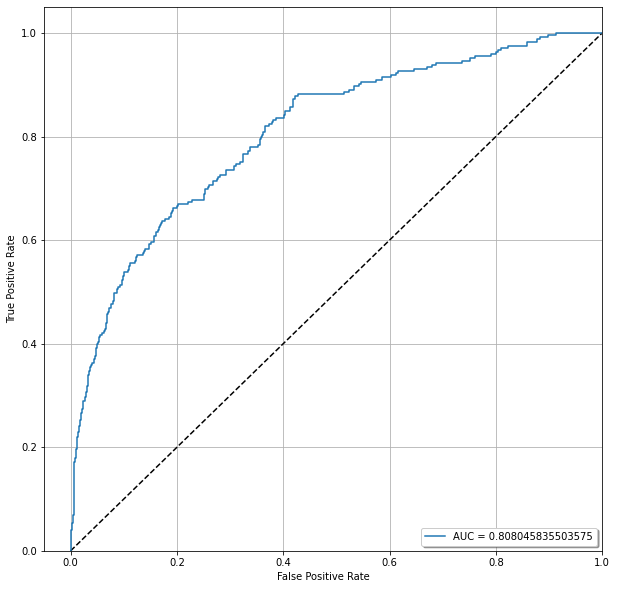

In [101]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# overall accuracy
acc = model_hyperparam.score(valid_circular.X, valid_circular.y)

# get roc/auc info
y_mol_score = model_hyperparam.predict_proba(valid_circular.X)[:,1]

fpr = dict()
tpr = dict()
fpr, tpr, _= roc_curve(valid_circular.y, y_mol_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

#make plot 
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()


In [102]:
print(y_mol_score_test)
print(valid_circular.y)

print(roc_auc)
print (acc)

[0.53771716 0.47095168 0.57042543 0.51475234 0.58429513 0.57616309
 0.57773871 0.50817028 0.51475234 0.50061246 0.5225772  0.52854906
 0.55299109 0.52448964 0.57100977 0.5225772  0.50061246 0.57616309
 0.52140391 0.51694529 0.50021754 0.50298051 0.57846551 0.57616309
 0.51825309 0.5225772  0.57616309 0.50961745 0.5225772  0.58429513
 0.5225772  0.51884892 0.53714083 0.58253548 0.5225772  0.5309618
 0.51156048 0.5265767  0.53076844 0.58253548 0.50891444 0.49485444
 0.47596988 0.49674155 0.52367197 0.49484498 0.44873694 0.47826913
 0.47341184 0.46424455 0.48645239 0.50410936 0.46603073 0.47794034
 0.42976002 0.51169404 0.46611653 0.52470458 0.44478234 0.48357301
 0.50916815 0.4940932  0.45643528 0.55826259 0.45938896 0.49318538
 0.49743853 0.46314589 0.4478035  0.50842631 0.49555971 0.47544826
 0.46250137 0.4441783  0.44083808 0.46688622 0.54607897 0.52189488
 0.43314244 0.45047568 0.50883876 0.47178519 0.48894077 0.49286345
 0.44642145 0.50318745 0.4399985  0.50434297 0.50591154 0.49010

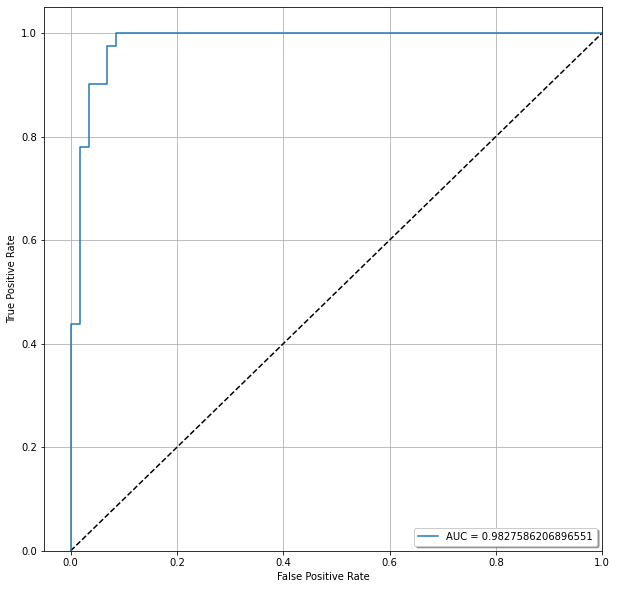

In [103]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# overall accuracy
acc = model_hyperparam.score(test_circular.X, test_circular.y)

# get roc/auc info
y_mol_score = model_hyperparam.predict_proba(test_circular.X)[:,1]

fpr = dict()
tpr = dict()
fpr, tpr, _= roc_curve(test_circular.y, y_mol_score)

roc_auc = dict()
roc_auc = auc(fpr, tpr)

#make plot 
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.plot(fpr, tpr, label='AUC = {0}'.format(roc_auc))        
plt.legend(loc="lower right", shadow=True, fancybox =True) 
plt.show()


In [105]:
print(y_mol_score_test)
print(test_circular.y)

print(roc_auc)
print (acc)

[0.53771716 0.47095168 0.57042543 0.51475234 0.58429513 0.57616309
 0.57773871 0.50817028 0.51475234 0.50061246 0.5225772  0.52854906
 0.55299109 0.52448964 0.57100977 0.5225772  0.50061246 0.57616309
 0.52140391 0.51694529 0.50021754 0.50298051 0.57846551 0.57616309
 0.51825309 0.5225772  0.57616309 0.50961745 0.5225772  0.58429513
 0.5225772  0.51884892 0.53714083 0.58253548 0.5225772  0.5309618
 0.51156048 0.5265767  0.53076844 0.58253548 0.50891444 0.49485444
 0.47596988 0.49674155 0.52367197 0.49484498 0.44873694 0.47826913
 0.47341184 0.46424455 0.48645239 0.50410936 0.46603073 0.47794034
 0.42976002 0.51169404 0.46611653 0.52470458 0.44478234 0.48357301
 0.50916815 0.4940932  0.45643528 0.55826259 0.45938896 0.49318538
 0.49743853 0.46314589 0.4478035  0.50842631 0.49555971 0.47544826
 0.46250137 0.4441783  0.44083808 0.46688622 0.54607897 0.52189488
 0.43314244 0.45047568 0.50883876 0.47178519 0.48894077 0.49286345
 0.44642145 0.50318745 0.4399985  0.50434297 0.50591154 0.49010

In [0]:
import cPickle 
with open('/content/drive/My Drive/Project De Novo/output_dir_rf', 'wb') as f:
    cPickle.dump(rf, f)
    